In [1]:
%load_ext autoreload
%autoreload 2
 
import sys
sys.path.append("../src")

from clustering_library import ClusterAnalyzer
import matplotlib.pyplot as plt

e:\AIO\Module 6\customer-segmentation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
scaled_path = "../data/processed/customer_features_scaled.csv"
original_path = "../data/processed/customer_features.csv"

analyzer = ClusterAnalyzer(scaled_path, original_path)
df_scaled, df_original = analyzer.load_data()

df_scaled.head()

Number of customers: 3921
Number of features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836


In [3]:
print("Descriptive statistics of standardized data:")
df_scaled.describe().round(2)

Descriptive statistics of standardized data:


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00
mean,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-3.90,-5.07,-2.99,-5.04,-1.16,-2.30,-1.02,-2.31,-5.07,-4.20,-3.04,-6.00,-5.14,-2.99,-3.00,-3.17
25%,-0.66,-0.55,-0.48,-0.65,-1.16,-0.70,-1.02,-0.65,-0.56,-0.58,-0.42,-0.60,-0.55,-0.57,-0.50,-0.45
50%,-0.03,0.04,0.08,0.00,-0.20,-0.00,-0.23,0.02,0.05,0.03,0.02,0.07,0.06,0.07,0.10,0.02
75%,0.67,0.59,0.48,0.69,0.89,0.70,0.81,0.64,0.57,0.62,0.48,0.58,0.58,0.56,0.47,0.51
max,4.98,4.55,3.80,4.60,2.43,4.77,2.07,4.20,3.95,8.85,3.73,7.48,4.52,3.38,3.76,3.34


### Principle Component Analysis (PCA)

- Decrease data dimension
- Visualize multidimensional data in 2D or 3D
- Understand which features are most important
- Remove noise and redundant information

In [4]:
df_pca = analyzer.apply_pca()
df_pca.head()

PCA shape: (3921, 16)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
CustomerID,,,,,,,,,,,,,,,,
000nan,5.104705,-6.063078,-6.391219,0.226072,-1.197016,-0.932380,0.608974,-2.324502,-0.421618,1.520668,1.335087,0.344153,0.849803,-0.305922,0.152621,0.421494
012346,11.876819,-2.811105,5.279586,7.056986,0.348378,-0.627562,0.026393,4.394967,-0.403090,-0.147813,0.908287,-0.545115,0.249572,0.642368,0.531846,-0.184966
012747,3.293322,-0.261896,-2.094127,-1.435189,0.633041,-0.106012,-0.189400,-0.024610,0.066971,0.302740,-0.089189,-0.029122,0.148284,0.107151,-0.113264,0.016799
012748,1.106624,-4.646175,-3.207660,-2.557721,-1.609905,-0.409120,1.302159,-0.980759,-0.661655,0.488401,1.454928,0.431079,-0.214607,-0.126055,0.127404,-0.191716
012749,1.486280,-1.811761,-2.660052,1.085017,-0.092466,0.212635,-0.054372,-0.136352,0.058247,-0.205333,-0.046851,-0.032185,-0.063369,0.024972,-0.000927,0.053809


### Explained variance ratio

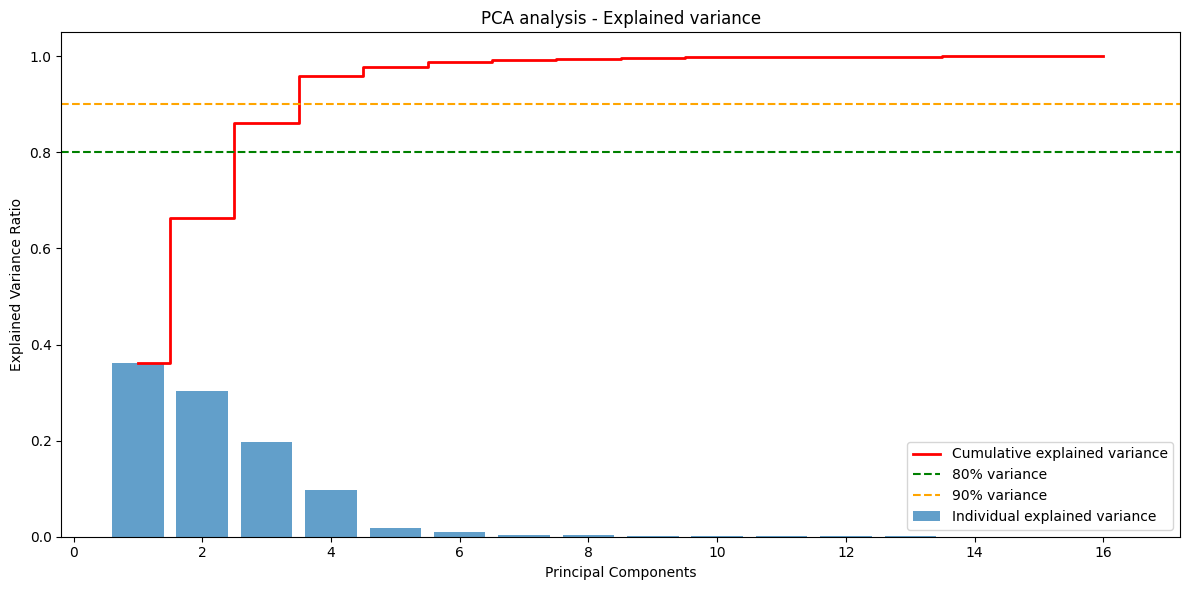


Cumulative variance:
PC1-PC1: 36.08%
PC1-PC2: 66.41%
PC1-PC3: 86.12%
PC1-PC4: 95.95%
PC1-PC5: 97.76%


In [5]:
analyzer.plot_pca_variance()

### Determine the optimal number of clusters.
1. Elbow method.
2. Silhouette Score

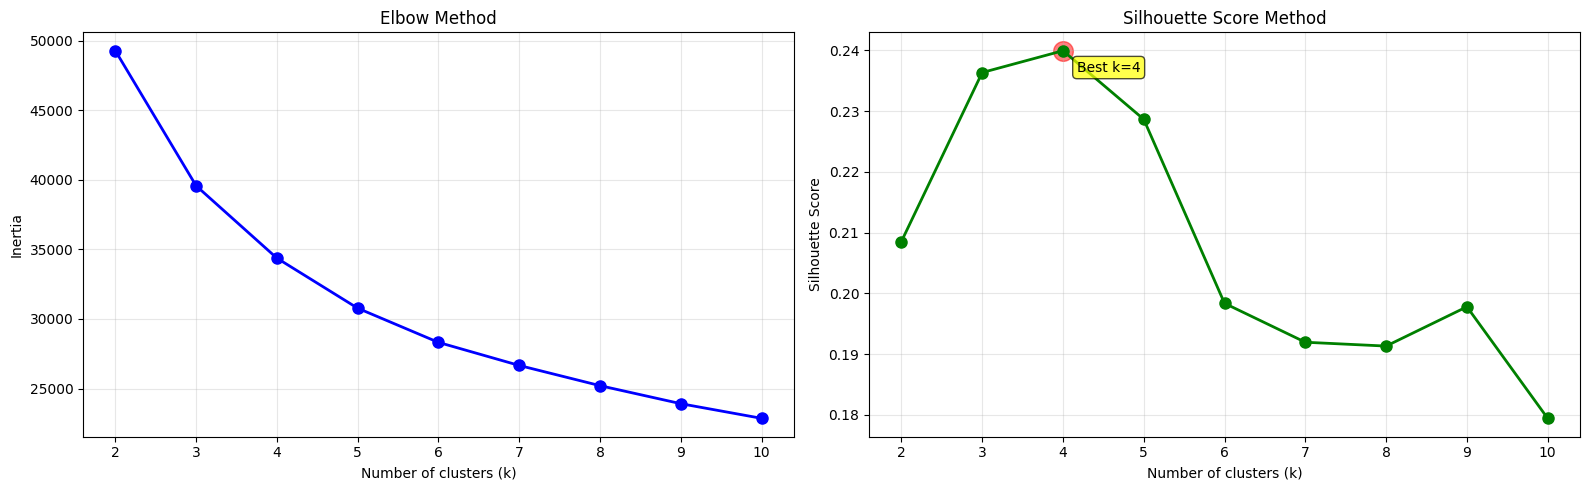

Silhouette method suggests optimal k = 4 (score: 0.240)


In [6]:
optimal_results = analyzer.find_optimal_clusters()
analyzer.plot_optimal_clusters()

### K-Means Clustering

Cluster size (k=3):
0     859
1    1536
2    1526
Name: count, dtype: int64
Cluster size (k=4):
0     847
1    1321
2     643
3    1110
Name: count, dtype: int64


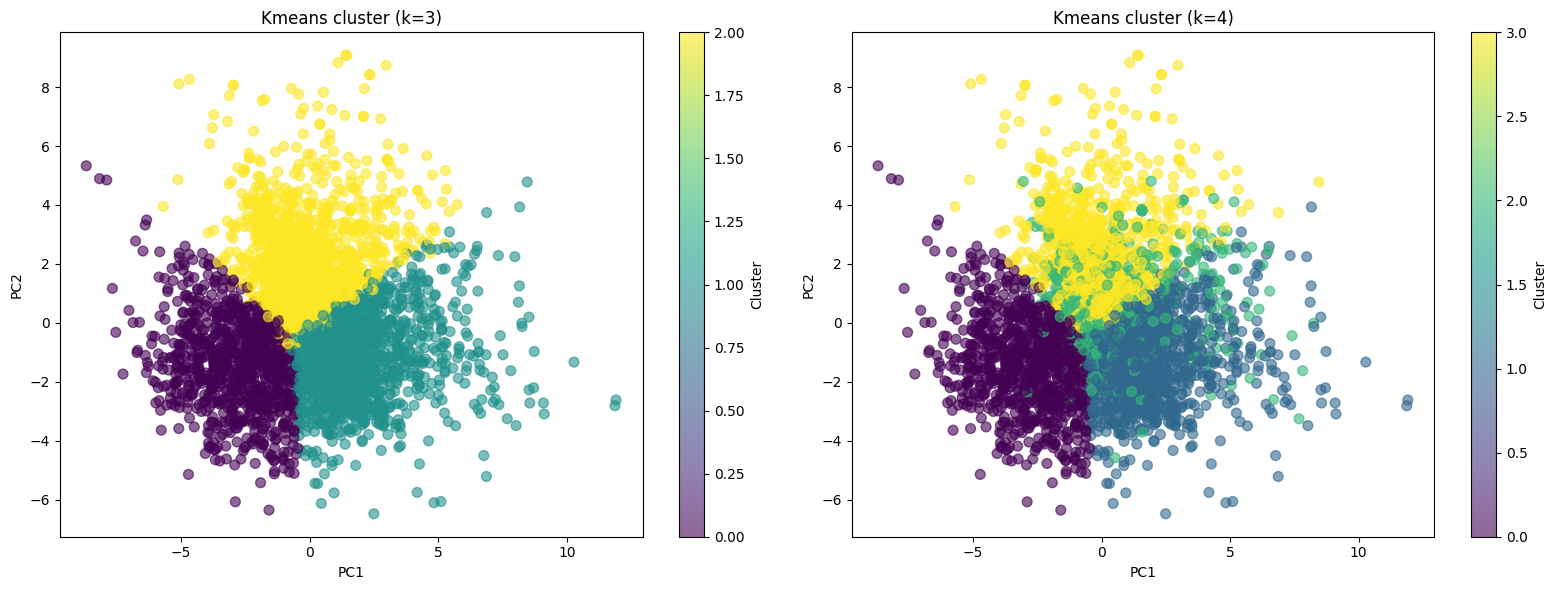

In [15]:
cluster_results = analyzer.apply_kmeans([3, 4])

analyzer.plot_clusters_pca([3, 4])

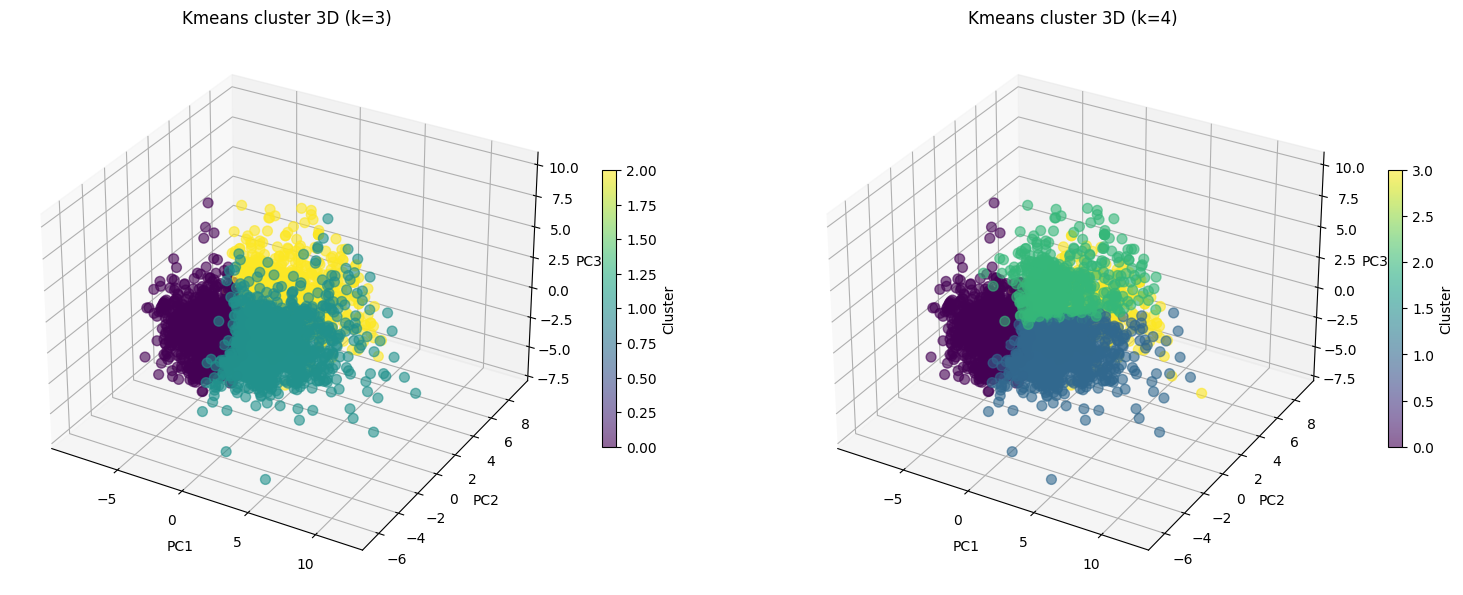

In [16]:
analyzer.plot_clusters_pca_3d([3, 4])

### Cluster analysis and interpretation

In [18]:
print("=== Analysis for 3 Clusters ===")
cluster_means_3 = cluster_results[3]['means']
cluster_sizes_3 = cluster_results[3]['sizes']

print("Size of clusters:")
for cluster, size in cluster_sizes_3.items():
    print(f"- Cluster {cluster}: {size:,} customers ({size/cluster_sizes_3.sum()*100:.1f}%)")

display(cluster_means_3.round(2).style.background_gradient(cmap='viridis', axis=0))

=== Analysis for 3 Clusters ===
Size of clusters:
- Cluster 0: 859 customers (21.9%)
- Cluster 1: 1,536 customers (39.2%)
- Cluster 2: 1,526 customers (38.9%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock,Cluster_4
Cluster_3,,,,,,,,,,,,,,,,,
0,473.480000,2.620000,6.220000,773.330000,3.320000,95.850000,1.220000,42.130000,2.770000,156.800000,7.050000,245.150000,2.640000,4.700000,6.190000,7.540000,0.030000
1,2592.350000,3.550000,145.910000,5080.880000,8.220000,87.600000,1.510000,21.280000,4.230000,410.040000,170.950000,628.060000,3.760000,132.000000,143.890000,198.210000,2.860000
2,179.440000,6.410000,33.970000,364.810000,1.670000,16.090000,1.080000,11.290000,6.920000,123.740000,35.720000,240.720000,6.400000,16.850000,33.430000,39.300000,1.270000


In [20]:
print("=== Analysis for 4 Clusters ===")
cluster_means_4 = cluster_results[4]['means']
cluster_sizes_4 = cluster_results[4]['sizes']

print("Size of clusters:")
for cluster, size in cluster_sizes_4.items():
    print(f"- Cluster {cluster}: {size:,} customers ({size/cluster_sizes_4.sum()*100:.1f}%)")
    
display(cluster_means_4.round(2).style.background_gradient(cmap='viridis', axis=0))

=== Analysis for 4 Clusters ===
Size of clusters:
- Cluster 0: 847 customers (21.6%)
- Cluster 1: 1,321 customers (33.7%)
- Cluster 2: 643 customers (16.4%)
- Cluster 3: 1,110 customers (28.3%)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock,Cluster_3
Cluster_4,,,,,,,,,,,,,,,,,
0,474.690000,2.640000,6.190000,781.210000,3.350000,96.850000,1.220000,42.390000,2.790000,154.030000,7.030000,245.710000,2.660000,4.560000,6.150000,7.530000,0.000000
1,2844.000000,3.490000,145.210000,5734.390000,9.160000,97.500000,1.560000,22.220000,4.280000,390.020000,173.400000,642.570000,3.740000,121.810000,142.970000,180.970000,1.000000
2,494.000000,1.660000,50.460000,466.780000,1.710000,17.860000,1.110000,12.670000,1.680000,299.450000,52.760000,303.470000,1.670000,83.610000,50.120000,62.420000,1.630000
3,167.350000,8.610000,46.660000,439.880000,1.780000,17.240000,1.090000,11.440000,9.310000,103.700000,48.830000,261.750000,8.600000,12.580000,45.970000,76.880000,2.000000


### Radar chart for Cluster profile

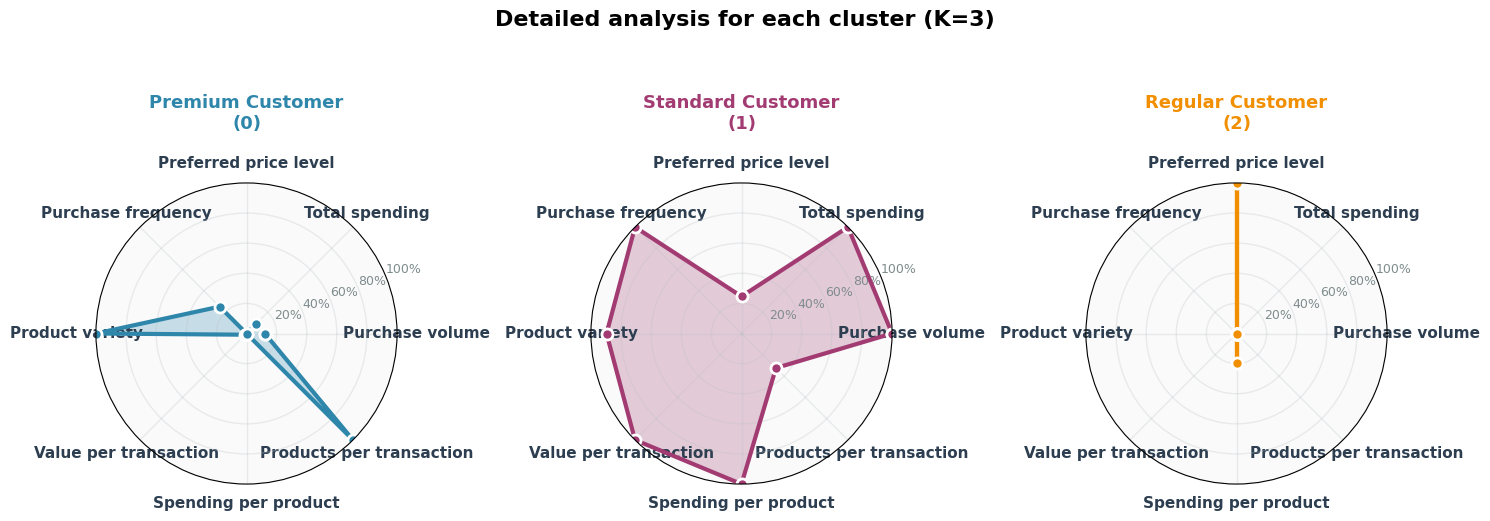

In [22]:
analyzer.create_individual_radar_plots(3, ["Premium Customer", "Standard Customer", "Regular Customer"])

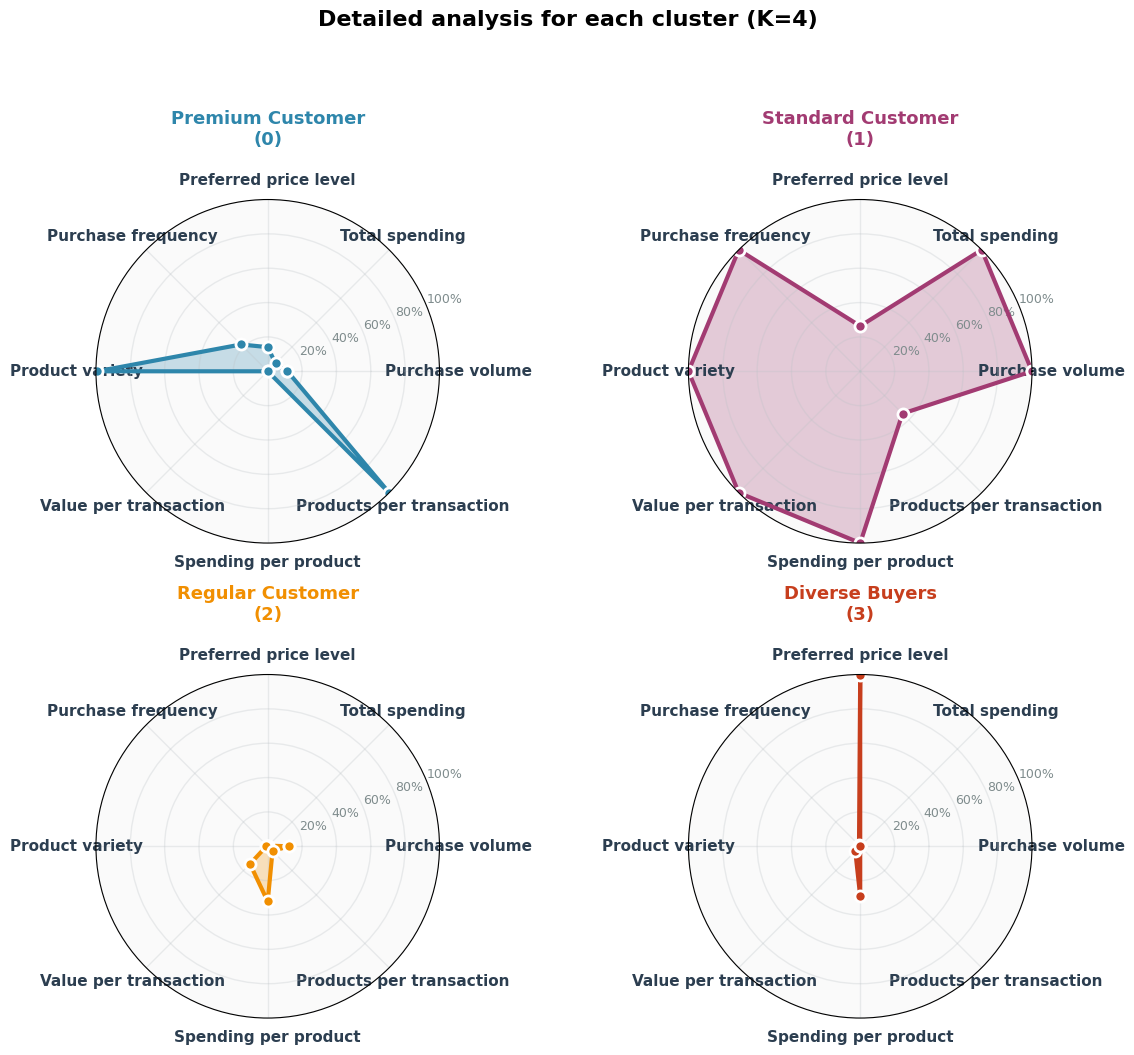

In [23]:
analyzer.create_individual_radar_plots(4, ["Premium Customer", "Standard Customer", "Regular Customer", "Diverse Buyers"])

### Radar Chart Comparison: K=3 vs K=4

**K=3 clusters (with indicative behaviors):**
- **Cluster 0 – Premium Customers:** Highest preferred price level; moderate purchase volume; few transactions but high value per transaction; strong product variety and products per transaction.
- **Cluster 1 – Standard/High-Volume Buyers:** High purchase volume and frequency; solid total spending; balanced price level; moderate products per transaction.
- **Cluster 2 – Regular/Value-Seeking:** Low across most dimensions; mainly distinguished by higher preferred price level vs its own low spending/volume profile.

**K=4 clusters (refined split):**
- **Cluster 0 – Premium:** Largely unchanged; still high products per transaction and variety at higher price points.
- **Cluster 1 – Standard:** Remains balanced and high-spend; slightly stronger than in K=3 on spending-related axes.
- **Cluster 2 – Regular:** Low activity overall; slightly higher spending per product than its K=3 counterpart.
- **Cluster 3 – Diverse Buyers (new):** Very high preferred price level; moderate/low on other dimensions.

**Why K=4 is more informative:**
- Splits the price-sensitive/high-price-interest segment (Diverse Buyers) out of the previous Regular/Standard mix, reducing within-cluster variance.
- Preserves the Premium and Standard patterns while isolating a distinct high-price-preference niche.

**Actionable takeaways:**
- **Premium:** Maintain VIP/premium assortments; emphasize depth per transaction and curated bundles.
- **Standard:** Target with loyalty and value-accumulation offers; maintain balanced assortment and frequency incentives.
- **Regular:** Nudge with entry offers and low-friction reactivation; focus on affordability.
- **Diverse Buyers:** Showcase high-end assortments and personalized recommendations; test price-led curation and concierge-like support.

### Save the clustering results

In [24]:
analyzer.save_clusters()

Saved clustering results for k=3: ../data/processed/customer_clusters_k3.csv
Saved clustering results for k=4: ../data/processed/customer_clusters_k4.csv


# SHAP 

### Step 1: Train Surrogate Models

In [26]:
surrogate_results_3 = analyzer.train_surrogate_model(3)

=== TRAINED SURROGATE MODEL (k=3) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[ 859    0    0]
 [   0 1536    0]
 [   0    0 1526]]

The model can predict the clusters ACCURATELY.


In [27]:
surrogate_results_4 = analyzer.train_surrogate_model(4)

=== TRAINED SURROGATE MODEL (k=4) ===
Accuracy: 1.0000 (100.00%)

Confusion Matrix:
[[ 847    0    0    0]
 [   0 1321    0    0]
 [   0    0  643    0]
 [   0    0    0 1110]]

The model can predict the clusters ACCURATELY.


### Step 2: Calculate SHAP Values

In [28]:
shap_results_3 = analyzer.calculate_shap_values(3)

Computing SHAP values for 3,921 customers...
Done! SHAP values: 3 clusters, each cluster shape: (3921, 16)


In [29]:
shap_results_4 = analyzer.calculate_shap_values(4)

Computing SHAP values for 3,921 customers...
Done! SHAP values: 4 clusters, each cluster shape: (3921, 16)


### Step 3: SHAP Features Importance

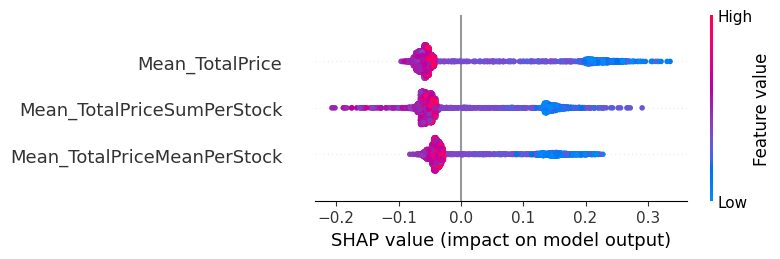

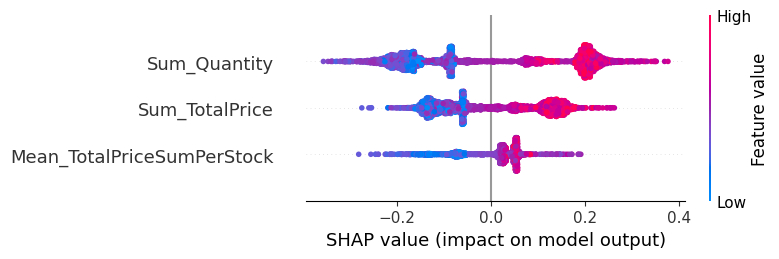

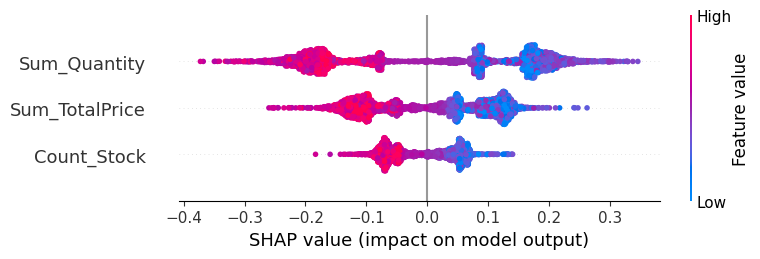

In [30]:
analyzer.plot_shap_summary(3)

### SHAP vs. Radar Insights (K=3)

Drawing on the radar charts (Cell 17) and SHAP summary plots (Cell 30) for the 3-cluster solution:



- **Cluster 0 – Premium Customer**: Radar shows the standout trait is **Preferred price level** despite low volume/frequency; SHAP highlights **Sum_Quantity**, **Sum_TotalPrice**, and **Count_Stock** as key drivers, indicating volume and assortment shifts the model more than the single high price preference seen on the radar.

- **Cluster 1 – Standard/High-Volume Buyer**: Radar covers the largest area on **Sum_TotalPrice**, **Sum_Quantity**, and **Count_Invoice**; SHAP confirms **Sum_Quantity** and **Sum_TotalPrice** push assignments into this cluster—high values on these features differentiate it from Premium (where they are low).

- **Cluster 2 – Regular/Variety-Seeking**: Radar extends toward **Count_Stock** and **Mean_StockCountPerInvoice**; SHAP surfaces **Mean_TotalPrice**, **Mean_TotalPriceSumPerStock**, and related price-per-item effects that are not explicit on the radar axes, showing hidden importance of spend-per-product patterns.



**Takeaway**: Radar provides a quick shape of each segment on headline KPIs, while SHAP reveals the underlying drivers (including features not plotted on the radar like price-per-product metrics). Using both together gives a fuller picture of what defines and separates the clusters.

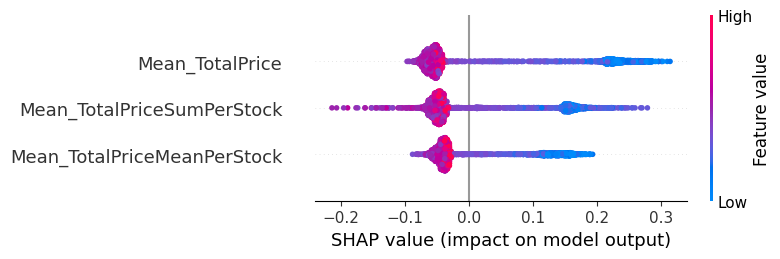

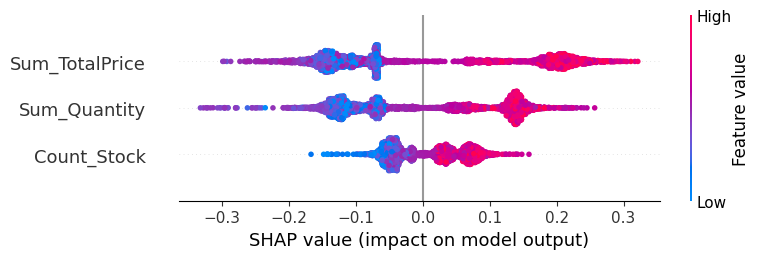

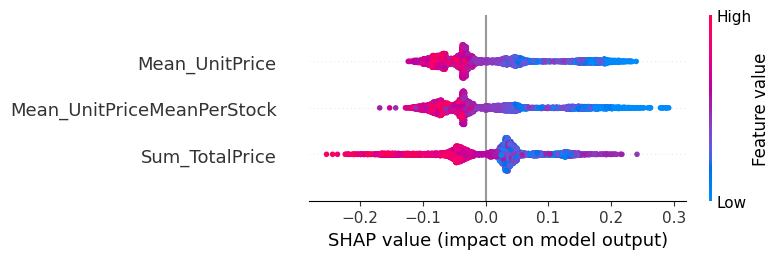

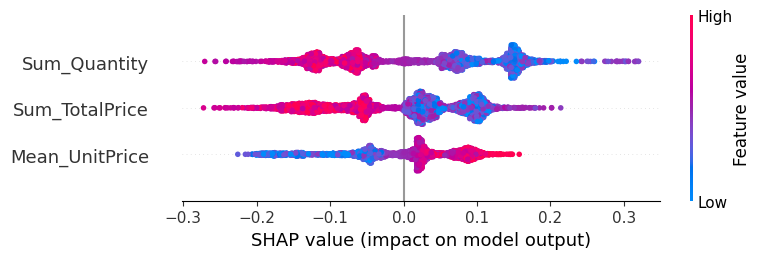

In [31]:
analyzer.plot_shap_summary(4)

### SHAP vs. Radar Insights (K=4)

Comparing the radar charts (Cell 18) with the SHAP beeswarm plots (Cell 33) for the 4-cluster solution:



- **Cluster 0 – Premium:** SHAP shows **Mean_UnitPrice** as the dominant driver; high values sit on the positive side, matching the radar’s spike in preferred price level while volume/frequency stay low.

- **Cluster 1 – Low-Volume Buyers:** Low **Sum_Quantity**, **Sum_TotalPrice**, and **Count_Invoice** push SHAP values negative on volume/frequency axes; aligns with the radar’s small footprint across spend and transactions.

- **Cluster 2 – High-Volume/Frequent Buyers:** SHAP places **Sum_Quantity** and **Sum_TotalPrice** strongly positive with red (high) values, confirming this is the heavy-spend/heavy-frequency segment that splits from Cluster 1.

- **Cluster 3 – Diverse Buyers:** SHAP elevates **Count_Stock** and **Mean_StockCountPerInvoice**, highlighting product variety and items per transaction as the key separators; radar similarly shows the variety-driven shape distinct from premium/volume-heavy groups.



**Takeaway**: At K=4, SHAP clarifies the decision boundaries, validating the split of the former “large buyers” into low- vs high-volume groups and isolating a variety-driven niche. Radar tells the **what** (segment shape on KPIs), while SHAP explains the **why** (feature-level drivers). Combining both strengthens business actions and trust in the clustering.